# Principal component analysys of High-speed data

In [1]:
import os
import numpy as np
import pickle

### SELECT DATA
from config import MRI8_NVF4_10mm_0p2mmVVV as cfg
#from config import MRI8_NVF4_10mm_0p0mmVVV as cfg
#from config import MRI8_NVF4_10mm_0p8mmVV as cfg
#from config import MRI8_NVF4_10mm_0p0mmVVVV as cfg

os.chdir('../')
from lib.methods import *

fig = Figure_BCVVFC({
                    'font.family':'Times New Roman',
                    'mathtext.fontset':'stix',
                    'font.size':30,
                    })

In [2]:
os.chdir('../')

## Load data

In [3]:
csv_data_list, video_data_list, video_t_data_list = LoadCSVandVIDEOS(
                                                                    csv_path=cfg.CSV_FILE_DIR+cfg.DATA_NAME+cfg.CSV_ADDITIONAL_PATH+'.csv', 
                                                                    data_name_list=['t', 'mic'], 
                                                                    sample_span=cfg.SAMPLE_SPAN, 
                                                                    videos_path_list=[
                                                                                    cfg.VIDEO_FILE_DIR+'VF/'+cfg.DATA_NAME+'.avi',
                                                                                    cfg.VIDEO_FILE_DIR+'FVF/'+cfg.DATA_NAME+'.avi',
                                                                                    ]
                                                                    )

Loading csv data
file path | ./data/VF_FVF_DATASETS/CSV/MRI8_NVF4_10mm_0p2mmVVV.csv
data list | t, mic
Loading video data
file path | ./data/VF_FVF_DATASETS/VIDEO/VF/MRI8_NVF4_10mm_0p2mmVVV.avi


Loading video data
file path | ./data/VF_FVF_DATASETS/VIDEO/FVF/MRI8_NVF4_10mm_0p2mmVVV.avi


## Preprocess

In [4]:
pp = PreProcessing(
                data=csv_data_list[1], ### mic data
                t_data=csv_data_list[0], ### mic t data
                video_data_list=video_data_list, 
                video_t_data_list=video_t_data_list
                )
pp.filter()
pp.filter_video(params_list=[cfg.FILTERING_VIDEO_PARAMS_VF, cfg.FILTERING_VIDEO_PARAMS_FVF])
pp.linescanning_video(params_list=[cfg.LINE_SCANNING_PARAMS_VF, cfg.LINE_SCANNING_PARAMS_FVF])
pp.standardize_video()

video_vf_kymogram_data =  pp.video_data_list[0]
video_fvf_kymogram_data =  pp.video_data_list[1]
video_vf_t_data = pp.video_t_data_list[0]
video_fvf_t_data = pp.video_t_data_list[1]

## Autoencoder (PCA)

In [5]:
AE_vf = AutoEncoder(data=video_vf_kymogram_data, 
                    method=cfg.AUTOENCODER_METHOD, 
                    params_pca=cfg.AUTOENCODER_PARAMS)
AE_vf.fit(video_vf_kymogram_data)
latent_vector_vf = AE_vf.encode(video_vf_kymogram_data)

In [6]:
AE_fvf = AutoEncoder(data=video_fvf_kymogram_data, 
                    method=cfg.AUTOENCODER_METHOD, 
                    params_pca=cfg.AUTOENCODER_PARAMS)
AE_fvf.fit(video_fvf_kymogram_data)
latent_vector_fvf = AE_fvf.encode(video_fvf_kymogram_data)

In [7]:
### SAVE
pickle.dump(latent_vector_vf[:, 0], open(cfg.PC_DIR+cfg.DATA_NAME+'_VF.pkl', 'wb'))
pickle.dump(latent_vector_fvf[:, 0], open(cfg.PC_DIR+cfg.DATA_NAME+'_FVF.pkl', 'wb'))
pickle.dump(video_vf_t_data, open(cfg.PC_DIR+cfg.DATA_NAME+'_t_VF.pkl', 'wb'))
pickle.dump(video_fvf_t_data, open(cfg.PC_DIR+cfg.DATA_NAME+'_t_FVF.pkl', 'wb'))

## Power Spectra

In [3]:
### LOAD
latent_vector_vf = pickle.load(open(cfg.PC_DIR+cfg.DATA_NAME+'_vf.pkl', 'rb'))
latent_vector_fvf = pickle.load(open(cfg.PC_DIR+cfg.DATA_NAME+'_fvf.pkl', 'rb'))
video_vf_t_data = pickle.load(open(cfg.PC_DIR+cfg.DATA_NAME+'_t_vf.pkl', 'rb'))
video_fvf_t_data = pickle.load(open(cfg.PC_DIR+cfg.DATA_NAME+'_t_fvf.pkl', 'rb'))

In [4]:
n_sample = 10000

fig = Figure({
            'font.family':'Times New Roman',
            'mathtext.fontset':'stix',
            'font.size':30,
            })

fig.plt_2powerspectra(data1=latent_vector_vf[:n_sample], t_data1=video_vf_t_data[:n_sample],
                      data2=latent_vector_fvf[:n_sample], t_data2=video_fvf_t_data[:n_sample],
                          label1='Vocal fold', label2='Ventricular fold',
                          linestyle1='-', linestyle2='--', 
                          c1='b', c2='r', 
                          lw1=5, lw2=5, 
                          figsize=(13, 6), 
                          freq_lim=(80, 260),
                          title=None,
                          legend_xy=(1., 0.5),
                          save_filename=None,)

TypeError: plt_2powerspectra() got an unexpected keyword argument 'freq_ylim'

4 datas

In [3]:
### SELECT 4 DATAS
from config import MRI8_NVF4_10mm_0p2mmVVV as cfg1
from config import MRI8_NVF4_10mm_0p0mmVVV as cfg2
from config import MRI8_NVF4_10mm_0p0mmVVVV as cfg4

cfg_list = [cfg1, cfg2, cfg4]

fig = Figure_BCVVFC({
                    'font.family':'Times New Roman',
                    'mathtext.fontset':'stix',
                    'font.size':30,
                    })

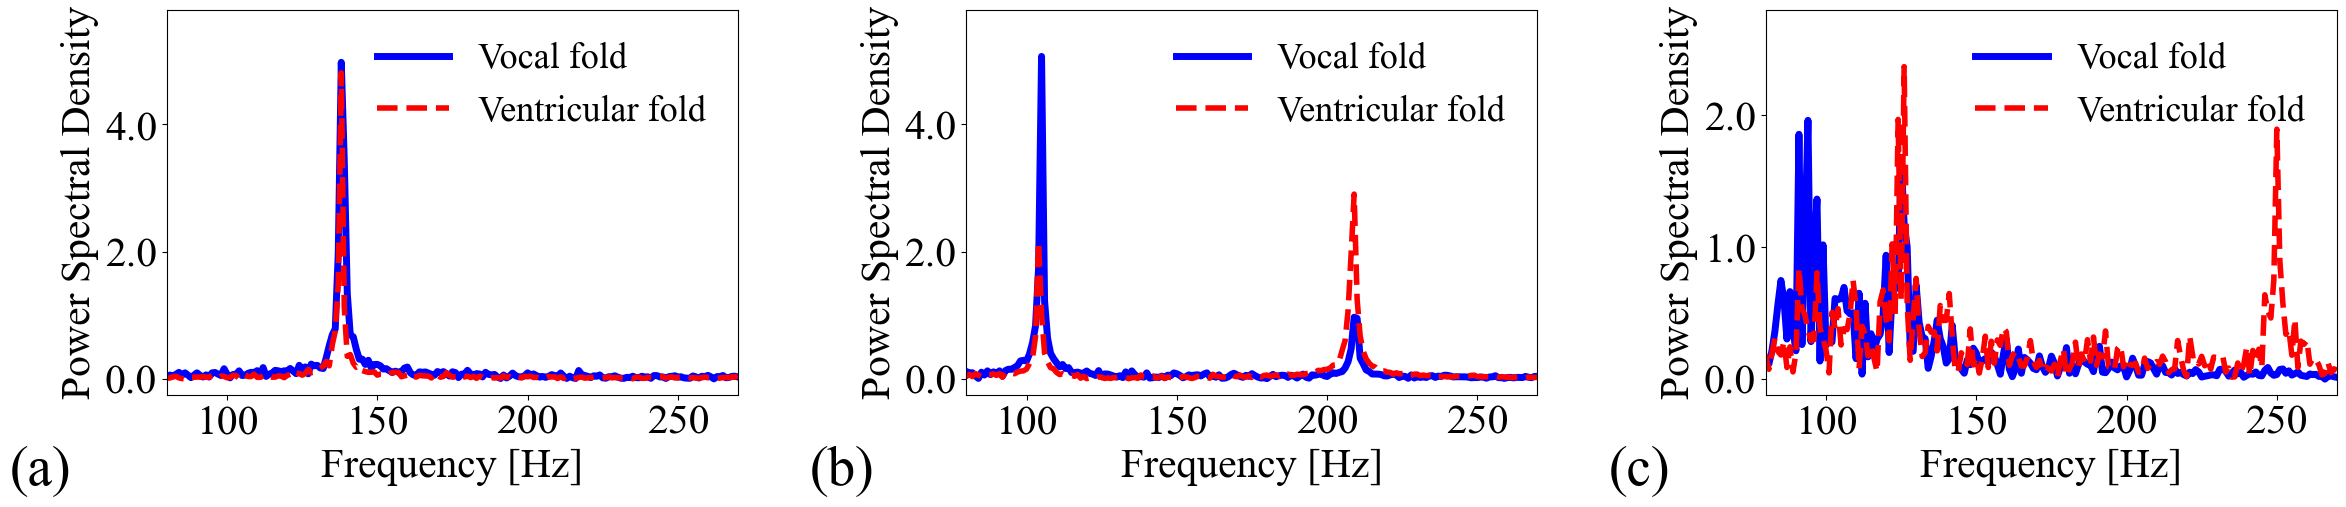

In [16]:
latent_vector_vf_list = []
latent_vector_fvf_list = []
video_vf_t_data_list = []
video_fvf_t_data_list = []

for i in range(3):
    cfg = cfg_list[i]
    latent_vector_vf_list.append(pickle.load(open(cfg.PC_DIR+cfg.DATA_NAME+'_vf.pkl', 'rb')))
    latent_vector_fvf_list.append(pickle.load(open(cfg.PC_DIR+cfg.DATA_NAME+'_fvf.pkl', 'rb')))
    video_vf_t_data_list.append(pickle.load(open(cfg.PC_DIR+cfg.DATA_NAME+'_t_vf.pkl', 'rb')))
    video_fvf_t_data_list.append(pickle.load(open(cfg.PC_DIR+cfg.DATA_NAME+'_t_fvf.pkl', 'rb')))


fig.figure05(data1_list=latent_vector_vf_list, t_data1_list=video_vf_t_data_list, 
            data2_list=latent_vector_fvf_list, t_data2_list=video_fvf_t_data_list,
            n_sample = 10000,
            label1='Vocal fold', label2='Ventricular fold',
            linestyle1='-', linestyle2='--', 
            c1='b', c2='r', 
            lw1=5, lw2=4, 
            figsize=(28, 5), 
            wspace=0.4,
            freq_lim=(80, 270),
            freq_ylim_list=[(None, 5.8), (None, 5.8), (None, 2.8)],
            title_list=[None, None, None, None],
            legend_fontsize=26,
            panel_list = ['(a)', '(b)', '(c)', '(d)'], panel_xy_list=[(0.26, 0.95), (0.26, 0.95), (0.26, 0.95), (0.18, 1.)], panel_fontsize=40, 
            save_filename='./results/figure/figure05.png',)